In [46]:
'''以下为Titanic数据特征工程处理技巧：包括特征提取、特征选择：
特征提取1、数值处理技巧包括：截断、二值化、分桶、缩放、缺失值处理、特征交叉、非线性编码、行统计量；2、探索性数据分析；3、类别特征；4、时间特征；
5、空间特征；6、文本特征。  特征选择 1、过滤方法 2、封装方法 3、嵌入方法'''
import numpy as np
from numpy import *
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
Y_test = pd.read_csv('./data/gender_submission.csv')
combine = [train_df, test_df]
print(train_df.columns.values)  #打印数据表字段的名称值



['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Survived']


In [47]:
'''获取数据集头部信息'''
train_df.head(5)  #预览数据集前5行

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [48]:
train_df.tail()  #预览数据集最后5行

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [49]:
'''随机抽取样本'''
train_df.sample(5)   #随机预览指定参数的样本数据

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
472,473,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S,1
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
533,534,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,1
778,779,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,0
455,456,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,1


In [50]:
'''文件总体描述'''
train_df.info()   #输出字段总共条数以及类型,dtype,memory空间

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [51]:
'''探索性数据分析，定量技术，求样本方差，均值等来描述数据'''
train_df.describe()  #数据的描述（总数，平均值，std,最大\小值25%，50%，75%）对于数据的快速统计汇总

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [102]:
# train_df.describe(include=['0'])

In [3]:
'''单变量过滤（覆盖率过滤方法）：特征变量和目标变量之间的相关性分析'''
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
#按照某一类别计算生存的平均值,来观察该字段对结果的影响性大小

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
'''可视化数据'''
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
"""需要专门去了解seaborn和matplotlib的可视化机制"""

'需要专门去了解seaborn和matplotlib的可视化机制'

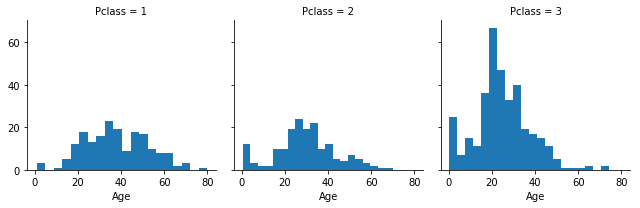

In [11]:
'''探索性数据分析（EDA），强调可视化数据，一类是可视化技术，一类是定量技术'''
g = sns.FacetGrid(train_df, col='Pclass')
g.map(plt.hist, 'Age', bins = 20)  #建立数据集中两个子集之间的对应关系

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


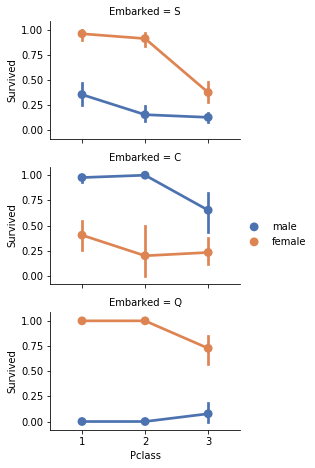

In [12]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [52]:

print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 12) (891, 12) (418, 12)
After (891, 10) (418, 10) (891, 10) (418, 10)


In [53]:
'''文本特征处理：文本统计特征'''
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])  #找出每个name缩写的人数

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [54]:
'''文本特征，类似于特征的融合'''
for dataset in combine:  #替换和融合原来特征,并且生成新的特征,然后按照某一特征进行分类
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [55]:
'''类别特征：自然数编码，此外比较常用的还有one-hot编码'''
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Rare':4}
for dataset in  combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()  #将非数值型特征转换为数值型特征

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1.0


In [56]:
# train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape  #删除掉已经融合过得特征

((891, 11), (418, 10))

In [58]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,892,3,male,34.5,0,0,7.8292,Q,0,1.0
1,893,3,female,47.0,1,0,7.0000,S,1,3.0
2,894,2,male,62.0,0,0,9.6875,Q,0,1.0
3,895,3,male,27.0,0,0,8.6625,S,0,1.0
4,896,3,female,22.0,1,1,12.2875,S,1,3.0


In [59]:
'''自然数编码'''
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
train_df.head()  #利用map函数直接将非数值型数值转换为数值型数据

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,3.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,3.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,1.0


In [60]:
'''数值特征处理：分桶'''
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) #将年龄均分成5个年龄段
'''过滤方法：覆盖率'''
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
#计算各个年龄段的存活率,按照年龄段升序排序
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [61]:
#用序号来代替每个年龄段
'''数值处理分桶——>自然数编码'''
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.sample(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,AgeBand
655,656,2,"Hickman, Mr. Leonard Mark",0,1.0,2,0,73.5000,S,0,1.0,"(16.336, 32.252]"
70,71,2,"Jenkin, Mr. Stephen Curnow",0,1.0,0,0,10.5000,S,0,1.0,"(16.336, 32.252]"
261,262,3,"Asplund, Master. Edvin Rojj Felix",0,0.0,4,2,31.3875,S,1,0.0,"(0.34, 16.336]"
642,643,3,"Skoog, Miss. Margit Elizabeth",1,0.0,3,2,27.9000,S,0,2.0,"(0.34, 16.336]"
42,43,3,"Kraeff, Mr. Theodor",0,NaN,0,0,7.8958,C,0,1.0,NaN
533,534,3,"Peter, Mrs. Catherine (Catherine Rizk)",1,NaN,0,2,22.3583,C,1,3.0,NaN
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",1,2.0,0,1,57.9792,C,1,3.0,"(32.252, 48.168]"


In [62]:
#删除掉AgeBend特征
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,S,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,C,1,3.0
2,3,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,S,1,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,S,1,3.0
4,5,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,S,0,1.0


In [63]:
'''数值处理：特征交叉'''
#组合现有的特征,融合成新的特征
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  #将SlibSp,Parch合成一列
train_df[['Survived', 'FamilySize']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [64]:
'''数值处理：缩放'''
#融合新的特征 是否独自乘船
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] ==1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [65]:
#将SibSp,Parch和FamilySize融合成一列IsAlone
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head(6)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
0,1,3,"Braund, Mr. Owen Harris",0,1.0,7.2500,S,0,1.0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,71.2833,C,1,3.0,0
2,3,3,"Heikkinen, Miss. Laina",1,1.0,7.9250,S,1,2.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,53.1000,S,1,3.0,0
4,5,3,"Allen, Mr. William Henry",0,2.0,8.0500,S,0,1.0,1
5,6,3,"Moran, Mr. James",0,NaN,8.4583,Q,0,1.0,1


In [66]:
'''数值处理：特征交叉'''
#直接对现有特征进行加减乘除生成新的特征
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
train_df.loc[:,['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,0.0,0.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [68]:
'''数值处理：缺失值处理，用频率最高的替代缺失值'''
combine = [train_df, test_df]
freq_port = train_df.Embarked.dropna().mode()[0]  #计算Embarked特征最高频率值
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)  #用最高频率值替代缺失值
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [69]:
'''类别特征：自然编码'''
#把分类要素转换为数字
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,Title,IsAlone,Age*Pclass
0,1,3,"Braund, Mr. Owen Harris",0,1.0,7.2500,0,0,1.0,0,3.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,71.2833,1,1,3.0,0,2.0
2,3,3,"Heikkinen, Miss. Laina",1,1.0,7.9250,0,1,2.0,1,3.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,53.1000,0,1,3.0,0,2.0
4,5,3,"Allen, Mr. William Henry",0,2.0,8.0500,0,0,1.0,1,6.0


In [70]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone,Age*Pclass
0,892,3,0,2.0,7.8292,2,0,1.0,1,6.0
1,893,3,1,2.0,7.0000,0,1,3.0,0,6.0
2,894,2,0,3.0,9.6875,2,0,1.0,1,6.0
3,895,3,0,1.0,8.6625,0,0,1.0,1,3.0
4,896,3,1,1.0,12.2875,0,1,3.0,0,3.0


In [71]:
'''数值处理：分桶—->自然编码（one-hot编码）'''
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [72]:
#将Fare按区间分成四段之后映射成4个数字
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,Title,IsAlone,Age*Pclass
0,1,3,"Braund, Mr. Owen Harris",0,1.0,0,0,0,1.0,0,3.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,3,1,1,3.0,0,2.0
2,3,3,"Heikkinen, Miss. Laina",1,1.0,1,0,1,2.0,1,3.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,3,0,1,3.0,0,2.0
4,5,3,"Allen, Mr. William Henry",0,2.0,1,0,0,1.0,1,6.0
5,6,3,"Moran, Mr. James",0,0.0,1,2,0,1.0,1,0.0
6,7,1,"McCarthy, Mr. Timothy J",0,3.0,3,0,0,1.0,1,3.0
7,8,3,"Palsson, Master. Gosta Leonard",0,0.0,2,0,0,0.0,0,0.0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,1,0,1,3.0,0,3.0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,2,1,1,3.0,0,0.0


In [73]:
train_df = train_df.drop(['PassengerId','Name'], axis=1)
test_df = test_df.drop('Survived', axis=1)
train_df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone,Age*Pclass
0,3,0,1.0,0,0,0,1.0,0,3.0
1,1,1,2.0,3,1,1,3.0,0,2.0
2,3,1,1.0,1,0,1,2.0,1,3.0
3,1,1,2.0,3,0,1,3.0,0,2.0
4,3,0,2.0,1,0,0,1.0,1,6.0


In [74]:
combine = [train_df, test_df]
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2.0,0,2,1.0,1,6.0
1,893,3,1,2.0,0,0,3.0,0,6.0
2,894,2,0,3.0,1,2,1.0,1,6.0
3,895,3,0,1.0,1,0,1.0,1,3.0
4,896,3,1,1.0,1,0,3.0,0,3.0


In [75]:
train_df[['Age*Pclass', 'Survived']].groupby(['Age*Pclass'], as_index=False).mean().sort_values(by='Age*Pclass', ascending=True)
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)

,Title,Survived
0,0.0,0.575000
1,1.0,0.156673
2,2.0,0.702703
3,3.0,0.793651
4,4.0,0.347826


In [76]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (418, 8))

In [78]:
# combine_trian = [X_train, Y_train]
# print(X_test)

In [30]:
combine = [train_df, test_df]
test_df.shape

(418, 9)

In [77]:
from collections import Iterable
isinstance(Y_train, Iterable)
Y_train = list(Y_train)
type(Y_train)

list

In [84]:
'''将处理好的特征保存到csv文件中'''
import csv
import pandas as pd
# with open('/JupyterProject/Comp/Comp/TitanicProject/data/train_y.csv', 'w', newline='') as fw:
# csv_file = csv.writer(fw)
dataframe = pd.DataFrame(X_test)
dataframe.to_csv('/JupyterProject/Comp/TitanicProject/data/Fea_test.csv', sep=',')
    

#     for i in range(len(Y_train)):
#         csv_file.writerow(Y_train[i])
#         print(Y_train[i])
#     csv_file.writerow(Y_train)
#     print(len(Y_train))

    
    
    

In [11]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

NameError: name 'X_train' is not defined

In [2]:
import pandas as pd

train_x = pd.read_csv('./data/train_feature.csv')
test_x = pd.read_csv('./data/test_feature.csv')
test_y = pd.read_csv('./data/gender_submission.csv')
train_y = pd.read_csv('./data/train_y.csv')
# train_y = list(train_y)
print(test_x.loc[3].values)

[896.   3.   1.   1.   1.   0.   3.   0.   3.]
